   #                                        <font color = '#5DADE2'>   🎮 Video Game Sales-Data Visualization  🎮

#                          <img src="games.jpg">

# Introduction

We have a dataset of game sales from the 1980s to the present.

Contains various information about global sales of video games.

<font color = '#B03A2E'>


Content:

1. [Importing libraries](#1)
2. [Data Exploration](#2)    
3. [Data Cleaning](#3)
4. [Data Vizualization](#4)
4. [Summary](#5)


 <a id = '1'></a><br>
 <font color = '#B03A2E'>
 # 1. Importing libraries 🧰

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [3]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<a id = '2'></a><br>
<font color = '#B03A2E'>
# 2. Data Exploration 🧪

### Read Data

In [4]:
df = pd.read_csv('.......\vgsales_csv\vgsales.csv',index_col = 'Rank') #Note here we are keeping the index as Rank
df #Note here we are reading the data.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


### Data description

In [5]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.shape

(16598, 10)

<a id = '3'></a><br>
<font color = '#B03A2E'>
# 3. Data Cleaning 🧹

#### Checking missing values

In [8]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
data_row_index = df[df['Year'] > 2015].index      
df = df.drop(data_row_index)

In [10]:
df #data cleaned

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [11]:
df.isnull().sum() #Note as we can see there are not much null value missing in our dataset which becomes handy for our analysis.

Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
#Filling the null values with 1
df['Year'].fillna(1, inplace=True)
df['Publisher'].fillna(1, inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [13]:
df.isnull().sum() # as we can see there is no missing values 

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### We have our data cleaned! 🎬

In [14]:
df 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


<a id = '4'></a><br>
<font color = '#B03A2E'>
# 4. Data Vizualization🎨

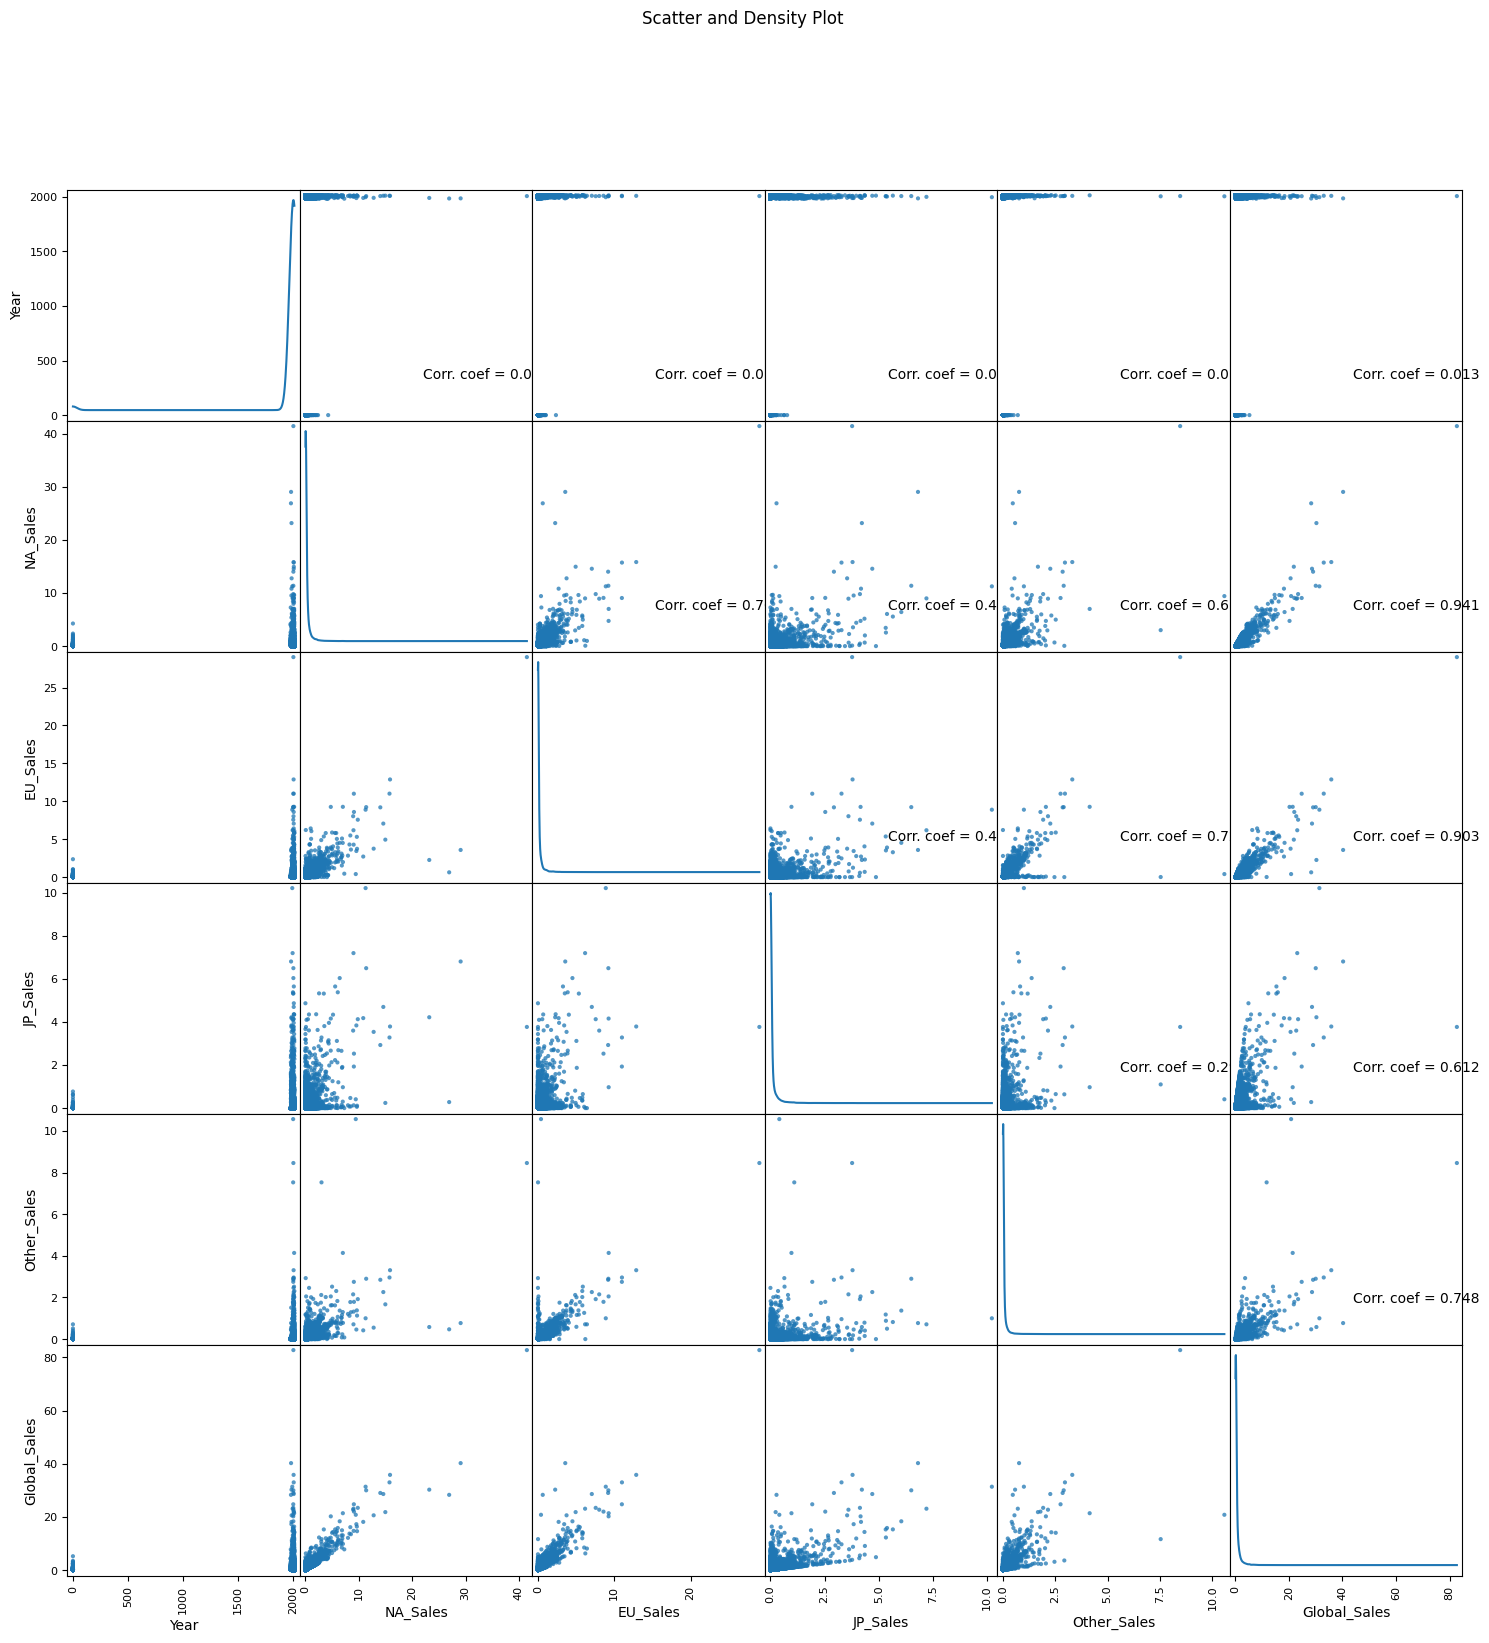

In [15]:
plotScatterMatrix(df, 18, 10)

 # Genre 
 * #### What genre games have been made the most?

In [16]:
df['Genre'].value_counts() #Note as we can see that the action genre has been made the most while most of the gamers preferred it.

Genre
Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: count, dtype: int64

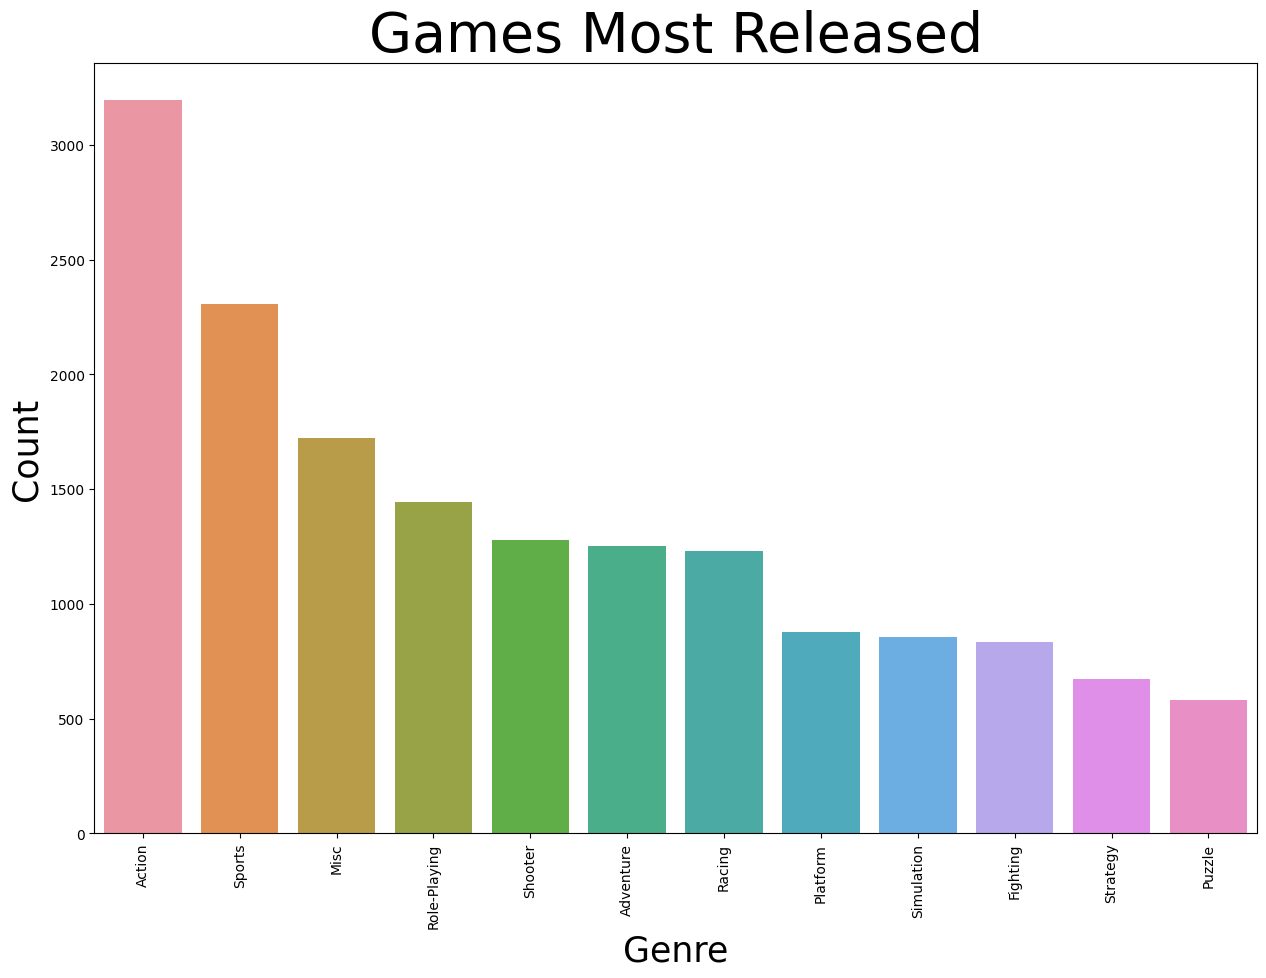

In [17]:
#Now let's see who sells the most
plt.figure(figsize=(15,10))
sns.countplot(x="Genre",data=df,order=df["Genre"].value_counts().index)
plt.xticks(rotation=90)
plt.title('Games Most Released',fontsize=40)    #Note labelling the data
plt.ylabel('Count',fontsize=25)                 #Note labelling the y-label
plt.xlabel('Genre',fontsize=25)                 #Note labelling the x-label
#We create a counting chart.
plt.show()

### As we can see in the above diagram that action and sports are the most released genre.

# the year with the highest number of game releases.

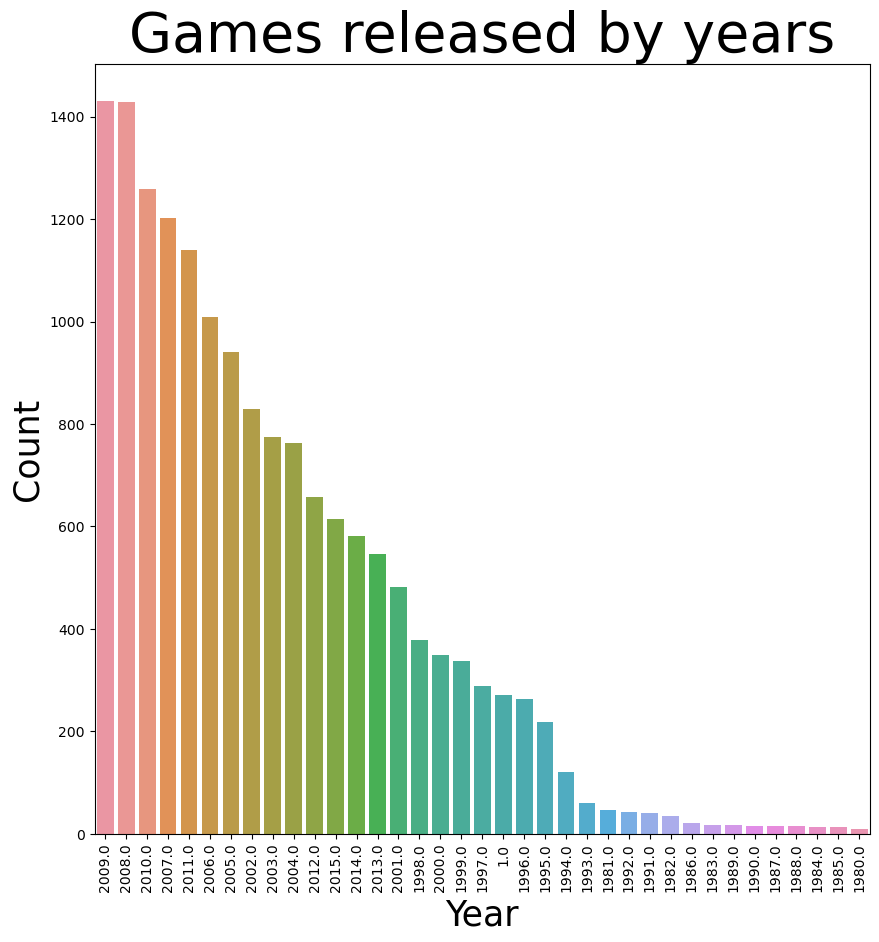

In [36]:
plt.figure(figsize=(10, 10))
sns.countplot(x="Year",data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation='vertical')
plt.title('Games released by years',fontsize=40)    #Note adding a title to the data
plt.ylabel('Count',fontsize = 25)                     #Note labelling the y-axis by count.
plt.xlabel('Year',fontsize = 25)                      #Note labelling the x-axis by year.
plt.show()

### As we can see in the above diagram that the 2009,2008,2010,2007 and 2011 has been the most game released

# Top 5 games genre release by years

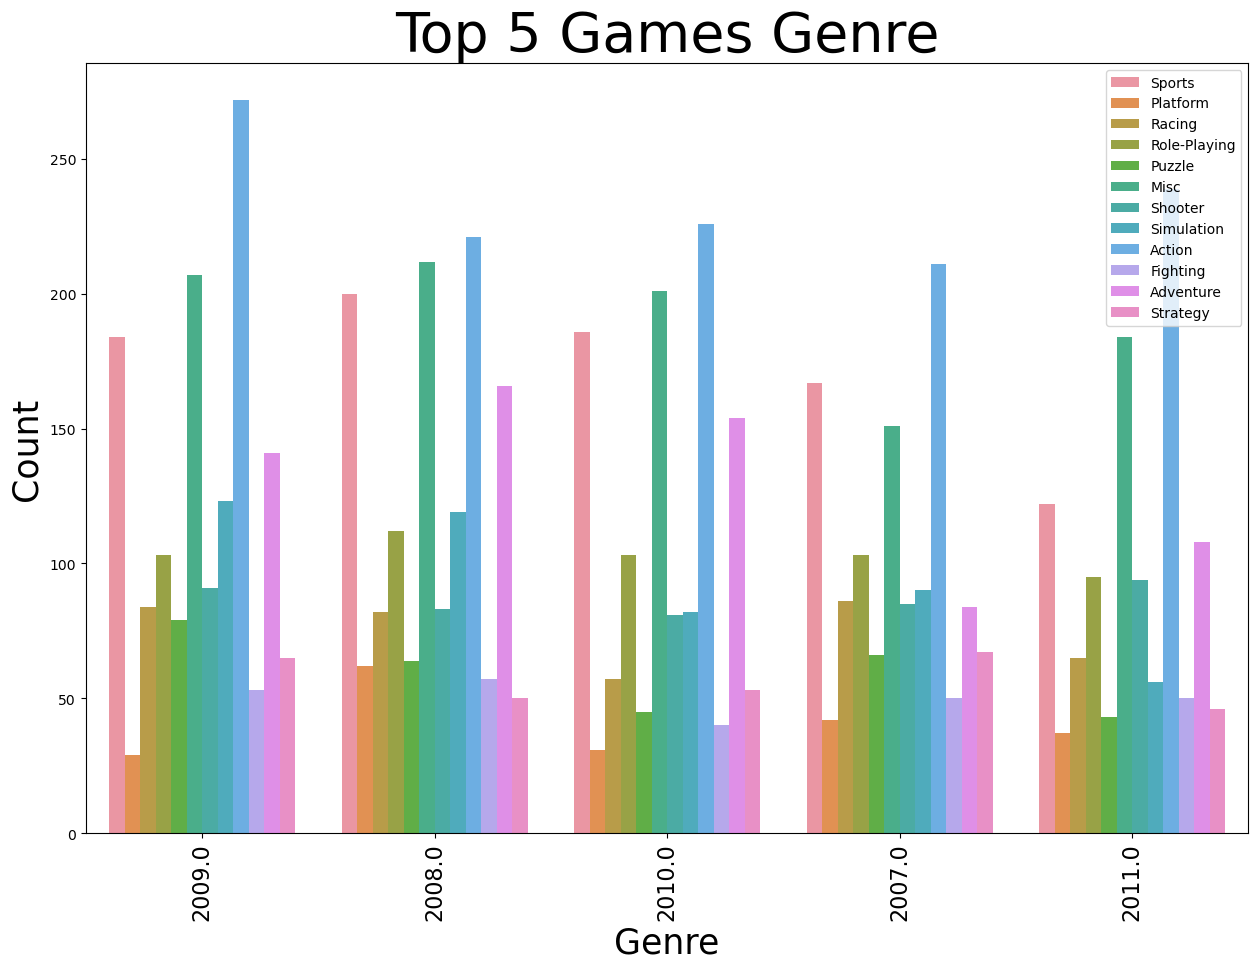

In [37]:
plt.figure(figsize=(15, 10))                            
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)    #Note iloc is used when we want to loc a range of data from starting to ending point.
plt.xticks(size=16, rotation='vertical')
plt.title('Top 5 Games Genre',fontsize = 40)   #Note labelling the data
plt.ylabel('Count',fontsize = 25)              #Note labelling the y-axis & aincreasing the size of the font.
plt.xlabel('Genre',fontsize = 25)              #Note labelling the x-axis & aincreasing the size of the font.
plt.legend()                                   #Note the small bar on the left side of the graphs represents the legend i.e by genre.
plt.show()

### As we can see in the above diagram that <b> Sports, Platform, Racing, Role-playing </b> and <b> Puzzle arev </b> the <b> top five game genre </b> released by years.

# Top 10 Selling Video Games

Which games reign supreme as the most popular and best-selling titles in the history of gaming?" Fortunately, our dataset conveniently provides the answer within the top rows, as it is sorted by the 'Global_Sales' column. 
Rather than resorting to a mundane method of reading the dataframe, I propose an exciting alternative: let's embark on an adventure of visualization to bring these iconic games to life! 

In [18]:
top_videogames = df[['Rank', 'Name', 'Global_Sales']].groupby('Name').sum().sort_values(by='Global_Sales', ascending=False)

In [19]:
top_videogames.head(10)

,Rank,Global_Sales
Name,,
Wii Sports,1,82.74
Grand Theft Auto V,2182,55.92
Super Mario Bros.,203,45.31
Tetris,162,35.84
Mario Kart Wii,3,35.82
Wii Sports Resort,4,33.00
Pokemon Red/Pokemon Blue,5,31.37
Call of Duty: Black Ops,5795,31.03
Call of Duty: Modern Warfare 3,3459,30.83


In [21]:
top_rank = df[['Rank', 'Name',]].groupby('Name').sum().sort_values(by='Rank', ascending=True)

In [22]:
top_rank.head(10)

,Rank
Name,
Wii Sports,1
Mario Kart Wii,3
Wii Sports Resort,4
Pokemon Red/Pokemon Blue,5
New Super Mario Bros.,7
Wii Play,8
New Super Mario Bros. Wii,9
Duck Hunt,10
Nintendogs,11


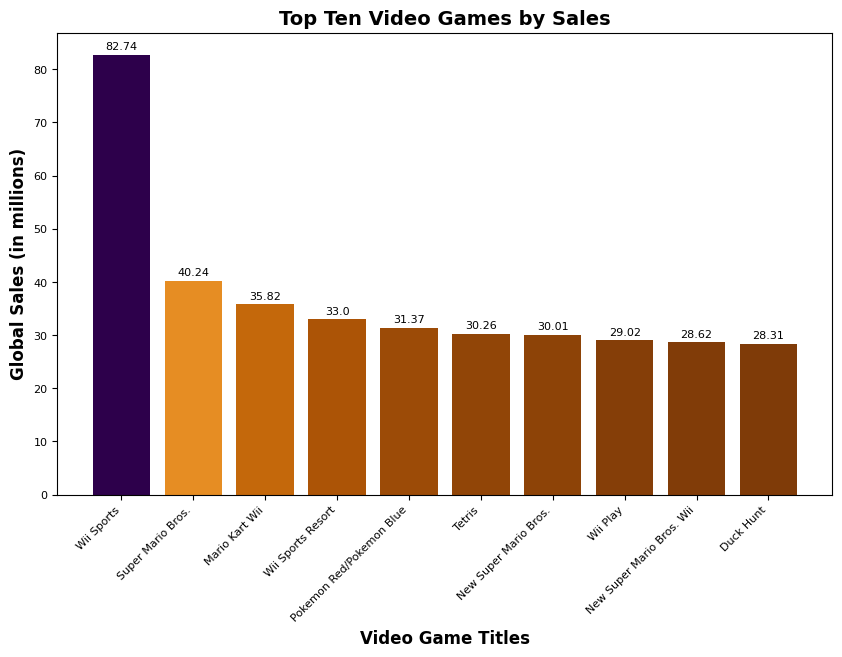

In [37]:
#rows with the top ten global sales
top_ten = df.nlargest(10, 'Global_Sales')

#set figure size
fig, ax = plt.subplots(figsize=(10, 6))

#define our x and y variable
x = top_ten['Name']
y = top_ten['Global_Sales']

#define our colormap
cmap = plt.colormaps.get_cmap('PuOr')                    #set colormap as winter (you can decide which cmap you prefer)
norm = mcolors.Normalize(vmin=y.min(), vmax=y.max())       #define normalizer for y values (Global_Sales)
colors = cmap(norm(y))                                     #normalize y values and then feed it into cmap to derive the colors of each bar

#create bar chart
ax.bar(x=x, height=y, color=colors)

#add value labels to each bar
for i, v in enumerate(y):
    ax.text(i, v + 1, str(v), ha='center', color="black", fontsize=8)

# set chart title and axis titles
ax.set_title('Top Ten Video Games by Sales', fontweight = "bold", fontsize= 14)
ax.set_xlabel('Video Game Titles', fontweight = "bold", fontsize= 12)
ax.set_ylabel('Global Sales (in millions)', fontweight = "bold", fontsize= 12)

#format axis ticks
plt.xticks(x, rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the chart
plt.show()

 I am particularly interested in exploring how the sales of these top 10 selling games are distributed across various regions.So, let's delve into the realm of visualizations and unlock the fascinating story behind the regional sales distribution of these gaming juggernauts!
 How much this top selling games be attributed to the North American market? The European market? The Japanese market? We can answer this question by building a Stacked Bar Chart.

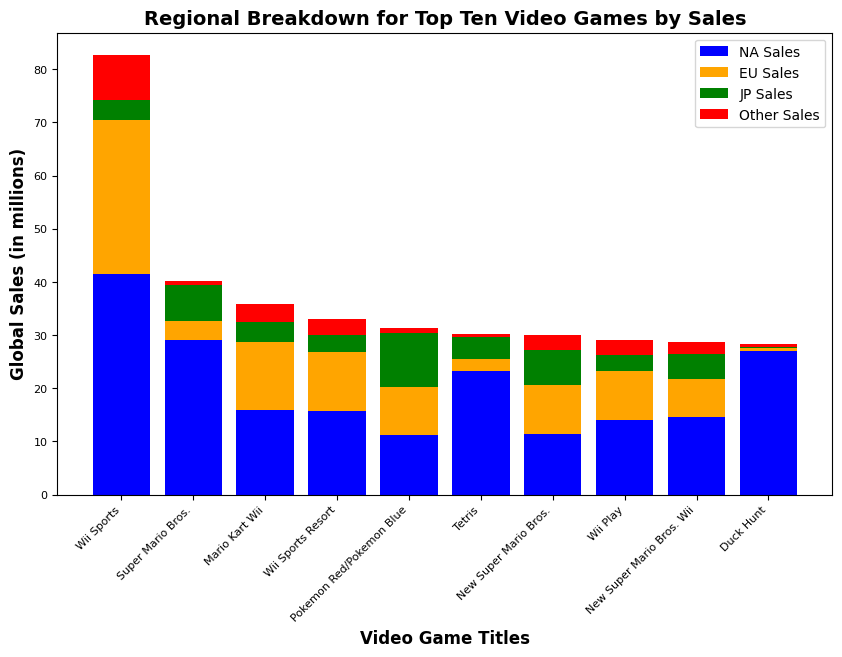

In [38]:
#extract our x and four y variables (sales from each region) from our top_ten video games
x = top_ten['Name']
y1 = top_ten["NA_Sales"]
y2 = top_ten["EU_Sales"]
y3 = top_ten["JP_Sales"]
y4 = top_ten["Other_Sales"]

#define figure size
fig, ax = plt.subplots(figsize=(10, 6))

#create the stack bar chart
ax.bar(x, y1, label='NA Sales', color='blue')
ax.bar(x, y2, label='EU Sales', color='orange', bottom=y1)
ax.bar(x, y3, label='JP Sales', color='green', bottom=y1+y2)
ax.bar(x, y4, label='Other Sales', color='red', bottom=y1+y2+y3)

#set the title, axis labels, and legend
ax.set_title('Regional Breakdown for Top Ten Video Games by Sales', fontweight = "bold", fontsize= 14)
ax.set_xlabel('Video Game Titles', fontweight = "bold", fontsize= 12)
ax.set_ylabel('Global Sales (in millions)', fontweight = "bold", fontsize= 12)
ax.legend()

#format axis ticks
plt.xticks(x, rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the chart
plt.show()

In terms of regional sales distribution:
 it is evident that <b> Tetris </b> and <b> Duck Hunt </b> have found their stronghold primarily in the North American market. Conversely, the Japanese market exhibits a significant affinity for  <b> Pokemon Red/Pokemon Blue </b> , accounting for a relatively larger share of its sales. Interestingly, the European market appears to show less enthusiasm for <b> Super Mario Bros. and Tetris </b> , as these titles have performed relatively poorly compared to other regions. These observations highlight the varying preferences and reception of games across different regions, showcasing the intricate dynamics of the global gaming landscape.

## Publishers of the Top Ten Selling Video Games

My next query revolves around the publishers behind these top-selling video games. 

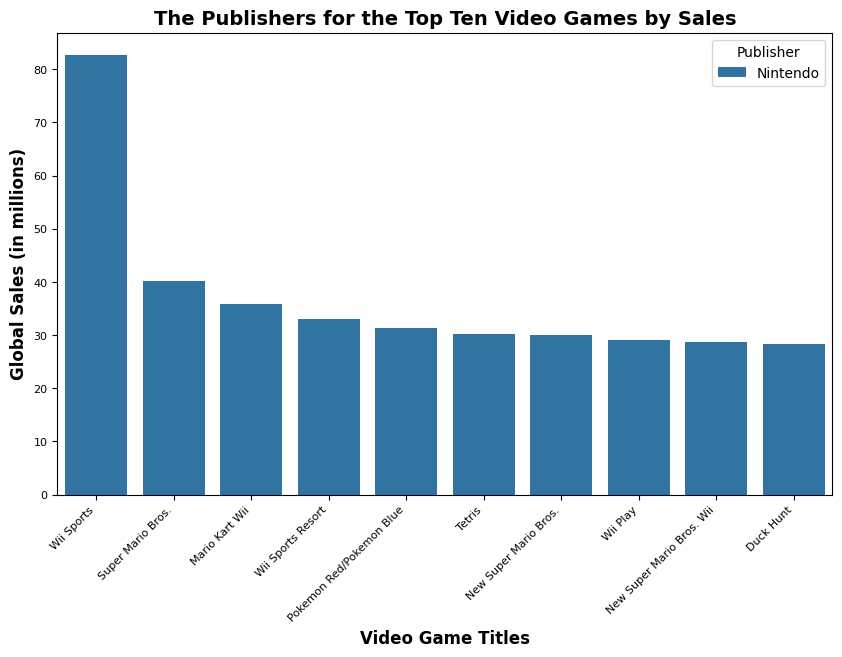

In [40]:
#define figure size
fig, ax = plt.subplots(figsize=(10, 6))

#seaborn to create barplot
ax = sns.barplot(data=top_ten, x="Name", y="Global_Sales", hue="Publisher", dodge=False)

#set the title, axis labels
ax.set_title('The Publishers for the Top Ten Video Games by Sales', fontweight = "bold", fontsize= 14)
ax.set_xlabel('Video Game Titles', fontweight = "bold", fontsize= 12)
ax.set_ylabel('Global Sales (in millions)', fontweight = "bold", fontsize= 12)

#format x and y ticks
plt.xticks(rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the chart
plt.show()

All top ten games were published by <b> Nintendo </b> .

## Platform

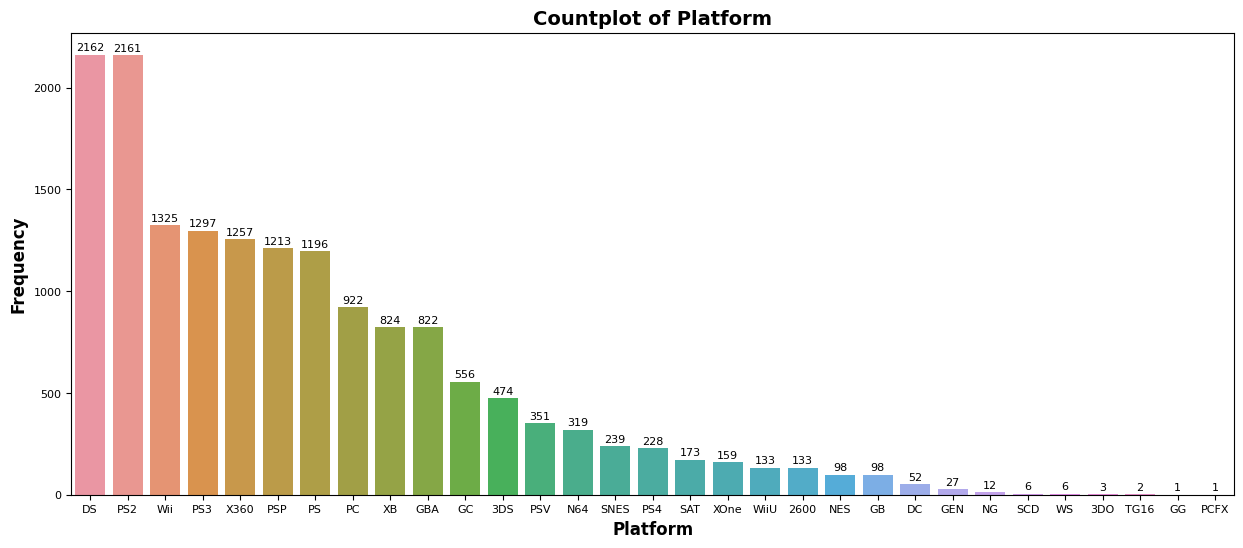

In [43]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#build frequency series to order the countplot
platform_freq = df['Platform'].value_counts()

#build countplot
ax = sns.countplot(data=df, x="Platform", order=platform_freq.index)

# Add count labels to the bars
for p in ax.patches:                                                   #ax.patches returns a list of all the graphical elements (which are the bars)
    ax.annotate(int(p.get_height()),                                   #display the value as the height of each bar (frequency)
                (p.get_x() + p.get_width() / 2., p.get_height()),      #xy coordinate for the point annotated (not where the text is located)
                ha = 'center',                                         #horizontal alignmet
                va = 'center',                                         #vertical alignment
                xytext = (0, 5),                                       #the location of the text annotation 
                textcoords = 'offset points',                          #set text position to be offset from the xy coordinate
                fontsize = 8)                                          #fontsize

# Set the axis labels and title
plt.xlabel('Platform', fontweight="bold", fontsize=12)
plt.ylabel('Frequency', fontweight="bold", fontsize=12)
plt.title('Countplot of Platform', fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#display the chart
plt.show()

## Year 

Indeed, the previous exploration was quite enjoyable, but now it's time to shift our focus to the next variable in line: the Year variable. With a time-series variable at our disposal, we have an array of possibilities to delve into. However, let's refrain from getting carried away just yet. The Year variable holds immense potential for unraveling trends and patterns, and we'll undoubtedly have an exciting journey ahead as we explore its insights. So, without further ado, let's begin our exploration of this fascinating variable while ensuring we maintain a steady pace.

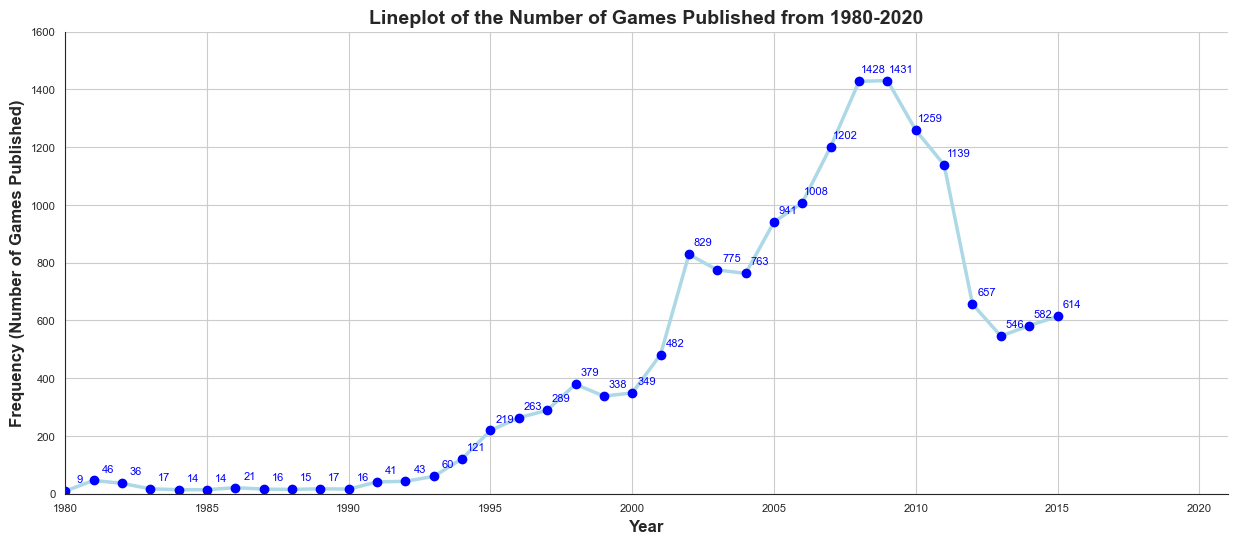

In [45]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#set seaborn style as white
sns.set_style("white")

#set up series for frequency of each Year
year = df["Year"].value_counts()

#build line plot
ax = sns.lineplot(x=year.index, y=year, lw=2.5, color="lightblue")

#add marker (the dots) and label 
for i, (x_coor, y_coor) in enumerate(year.items()):         #loop over the year frequency series and we can get the xy coordinate for each data point
    plt.plot(x_coor, y_coor, marker='o', color='blue')      #plot a blue dot on each data point
    plt.annotate(y_coor,                                    #also label that data point with the y-value (frequency)
                 xy=(x_coor, y_coor),                       #point to annotate
                 xytext=(x_coor+0.5, y_coor+40),            #position of text
                 fontsize=8,                                #font size
                 color='blue',                              #color of text
                 ha="center",                               #vertical alignment
                 va="center")                               #vertical alignment

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 1600)

# Add labels and title
plt.xlabel("Year", fontweight="bold", fontsize=12)
plt.ylabel("Frequency (Number of Games Published)", fontweight="bold", fontsize=12)
plt.title("Lineplot of the Number of Games Published from 1980-2020", fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#turn on grid
plt.grid(True)

#display the figure
plt.show()

After a careful examination of the dataset, a distinct pattern emerges regarding the number of games published over time. It becomes evident that there was a notable peak in game releases around the years <b> 2008-2009 </b> . However, subsequent to this peak, a significant decline in the number of game releases is observed. While the precise reasons underlying this phenomenon may vary, it gives the impression that the gaming industry is currently experiencing a downturn.

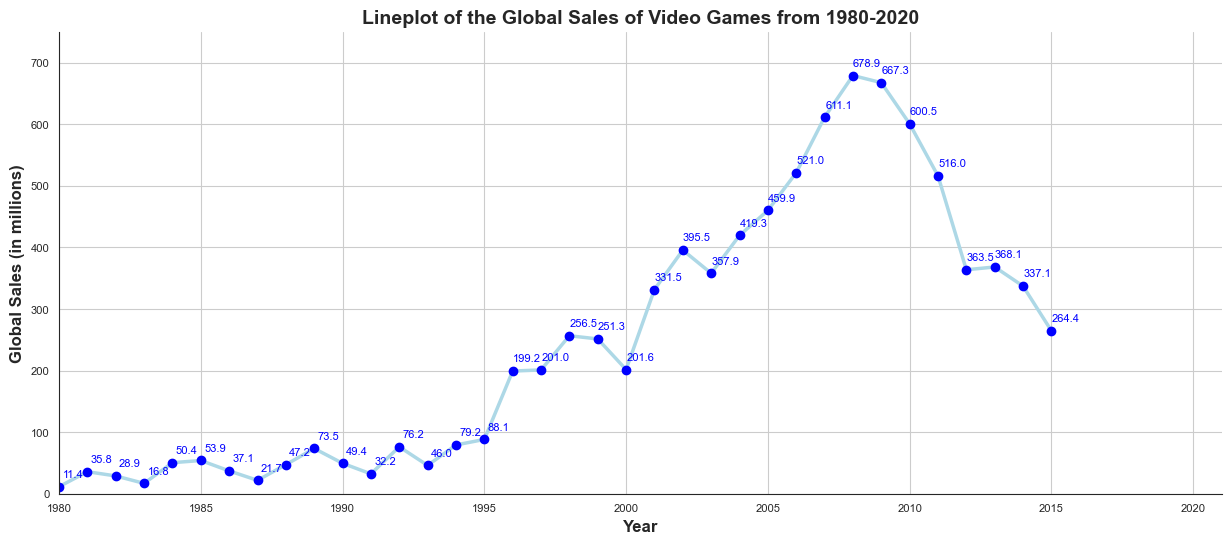

In [46]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#group Global_Sales by the Year
global_sales_by_year = df.groupby(['Year']).sum(numeric_only=True)["Global_Sales"]

#plot linegraph of Global_Sales
ax = sns.lineplot(x=global_sales_by_year.index, y=global_sales_by_year, lw=2.5, color="lightblue")

#add marker (the dots) and label 
for i, (x_coor, y_coor) in enumerate(global_sales_by_year.items()):
    plt.plot(x_coor, y_coor, marker='o', color='blue')
    plt.annotate(format(y_coor, '.1f'), 
                 xy=(x_coor, y_coor), 
                 xytext=(x_coor+0.5, y_coor+20), 
                 fontsize=8, 
                 color='blue', 
                 ha="center", 
                 va="center")
    
#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 750)

# Add labels and title
plt.xlabel("Year", fontweight="bold", fontsize=12)
plt.ylabel("Global Sales (in millions)", fontweight="bold", fontsize=12)
plt.title("Lineplot of the Global Sales of Video Games from 1980-2020", fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

In [77]:
#Now let's determine which year has the highest sales values worldwide using the global sales column.
data_year=df.groupby(by=["Year"])["Global_Sales"].sum()  
#First we wrote "Year" and then we wrote it according to whichever way we were going to do it.
data_year=data_year.reset_index()

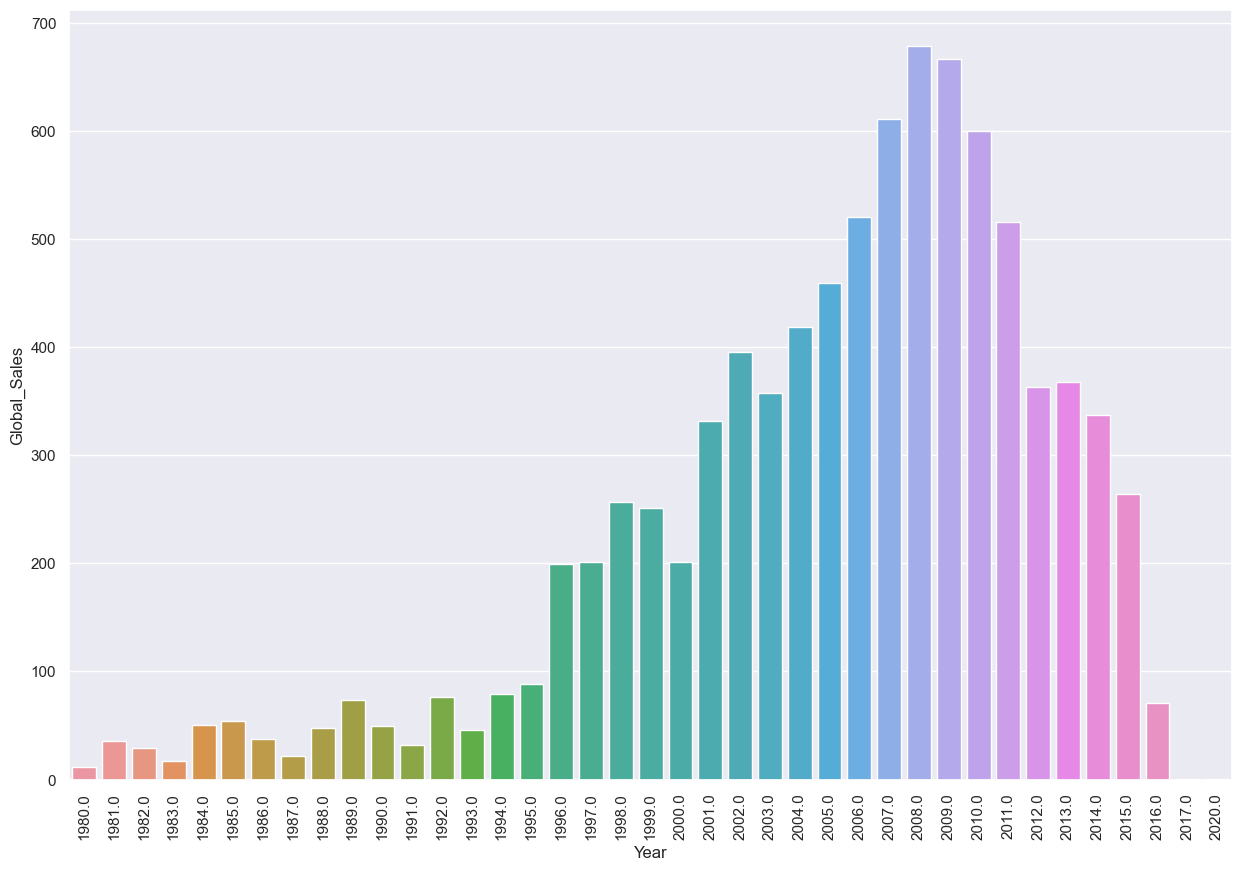

In [78]:
plt.figure(figsize=(15,10))
sns.barplot(x="Year",y="Global_Sales",data=data_year) 
plt.xticks(rotation=90,)
plt.show()
#if we have x and y values then we can't use countplot we can use barplot!!

It seems that there is a notable correlation between the trend for Global_Sales and the number of games published. Both variables follow a similar trajectory over time. This observation suggests that the quantity of games released may have a direct impact on the global sales figures within the gaming industry.

## Genre

Now let's shift our focus to the Genre variable. Similar to Platform, Genre is also a categorical variable.


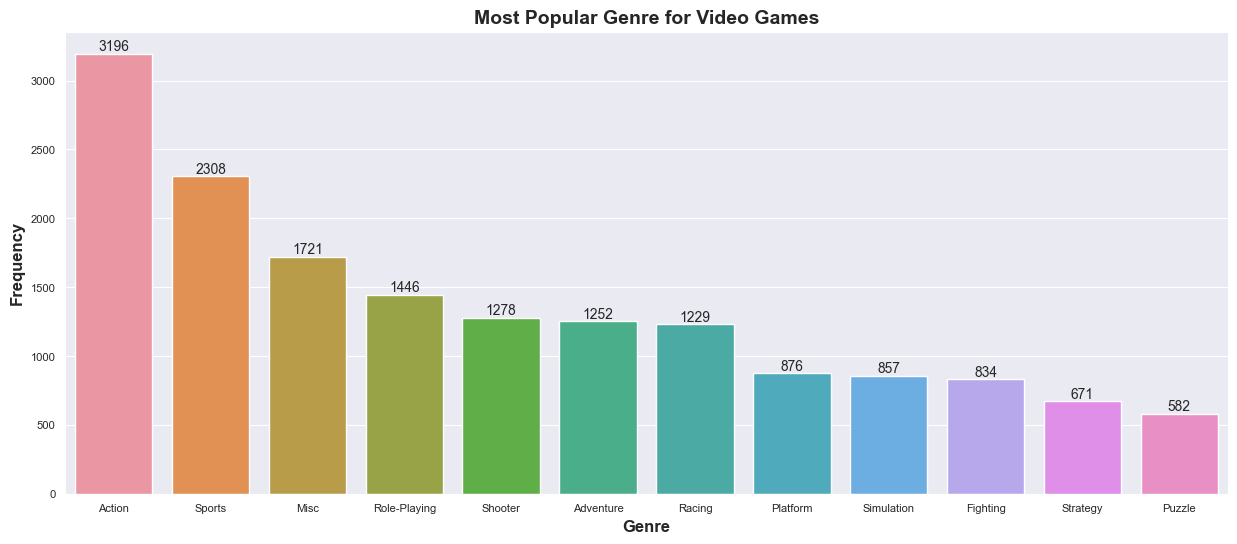

In [18]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#set seaborn style back to darkgrid
sns.set_style("darkgrid")

#genre frequency series
genre_freq = df['Genre'].value_counts()

#plot count plot and order in descending order
ax = sns.countplot(data=df, x="Genre", order=genre_freq.index)

#add count labels to the bars
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height() - 50), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize = 10)

# st the axis labels and title
plt.xlabel('Genre', fontweight="bold", fontsize=12)
plt.ylabel('Frequency', fontweight="bold", fontsize=12)
plt.title('Most Popular Genre for Video Games', fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#display the plot
plt.show()

# The Most Popular Game Genre Published Each Year

This analysis aims to uncover the prevailing game genre that receives the highest number of publications each year. By examining the annual distribution of game genres, we gain valuable insights into the ever-evolving landscape of the gaming industry. Through this exploration, we can identify trends, patterns, and shifts in popularity, providing a comprehensive overview of the most prominent game genre published annually.   

In [51]:
#Now let's determine which game genre is published the most in a year.
#For this, let's group by year and type columns  
year_max_df=df.groupby(by=["Year","Genre"]).size().reset_index(name="count")
# We grouped the year and genre datasets, we will use the highest value to find
# we checked the size with size, then we created a data frame called count !!!
year_max_idx=year_max_df.groupby(["Year"])["count"].transform(max)==year_max_df["count"] #we marked the rows with max
year_max_genre=year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep="last").reset_index(drop=True)
# with this code we can get a data frame with the highest number of types of each year

In [52]:
genre=year_max_genre["Genre"].values

In [53]:
genre 

array(['Action', 'Misc', 'Action', 'Action', 'Action', 'Shooter',
       'Puzzle', 'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports',
       'Sports', 'Fighting', 'Platform', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Sports',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action'], dtype=object)

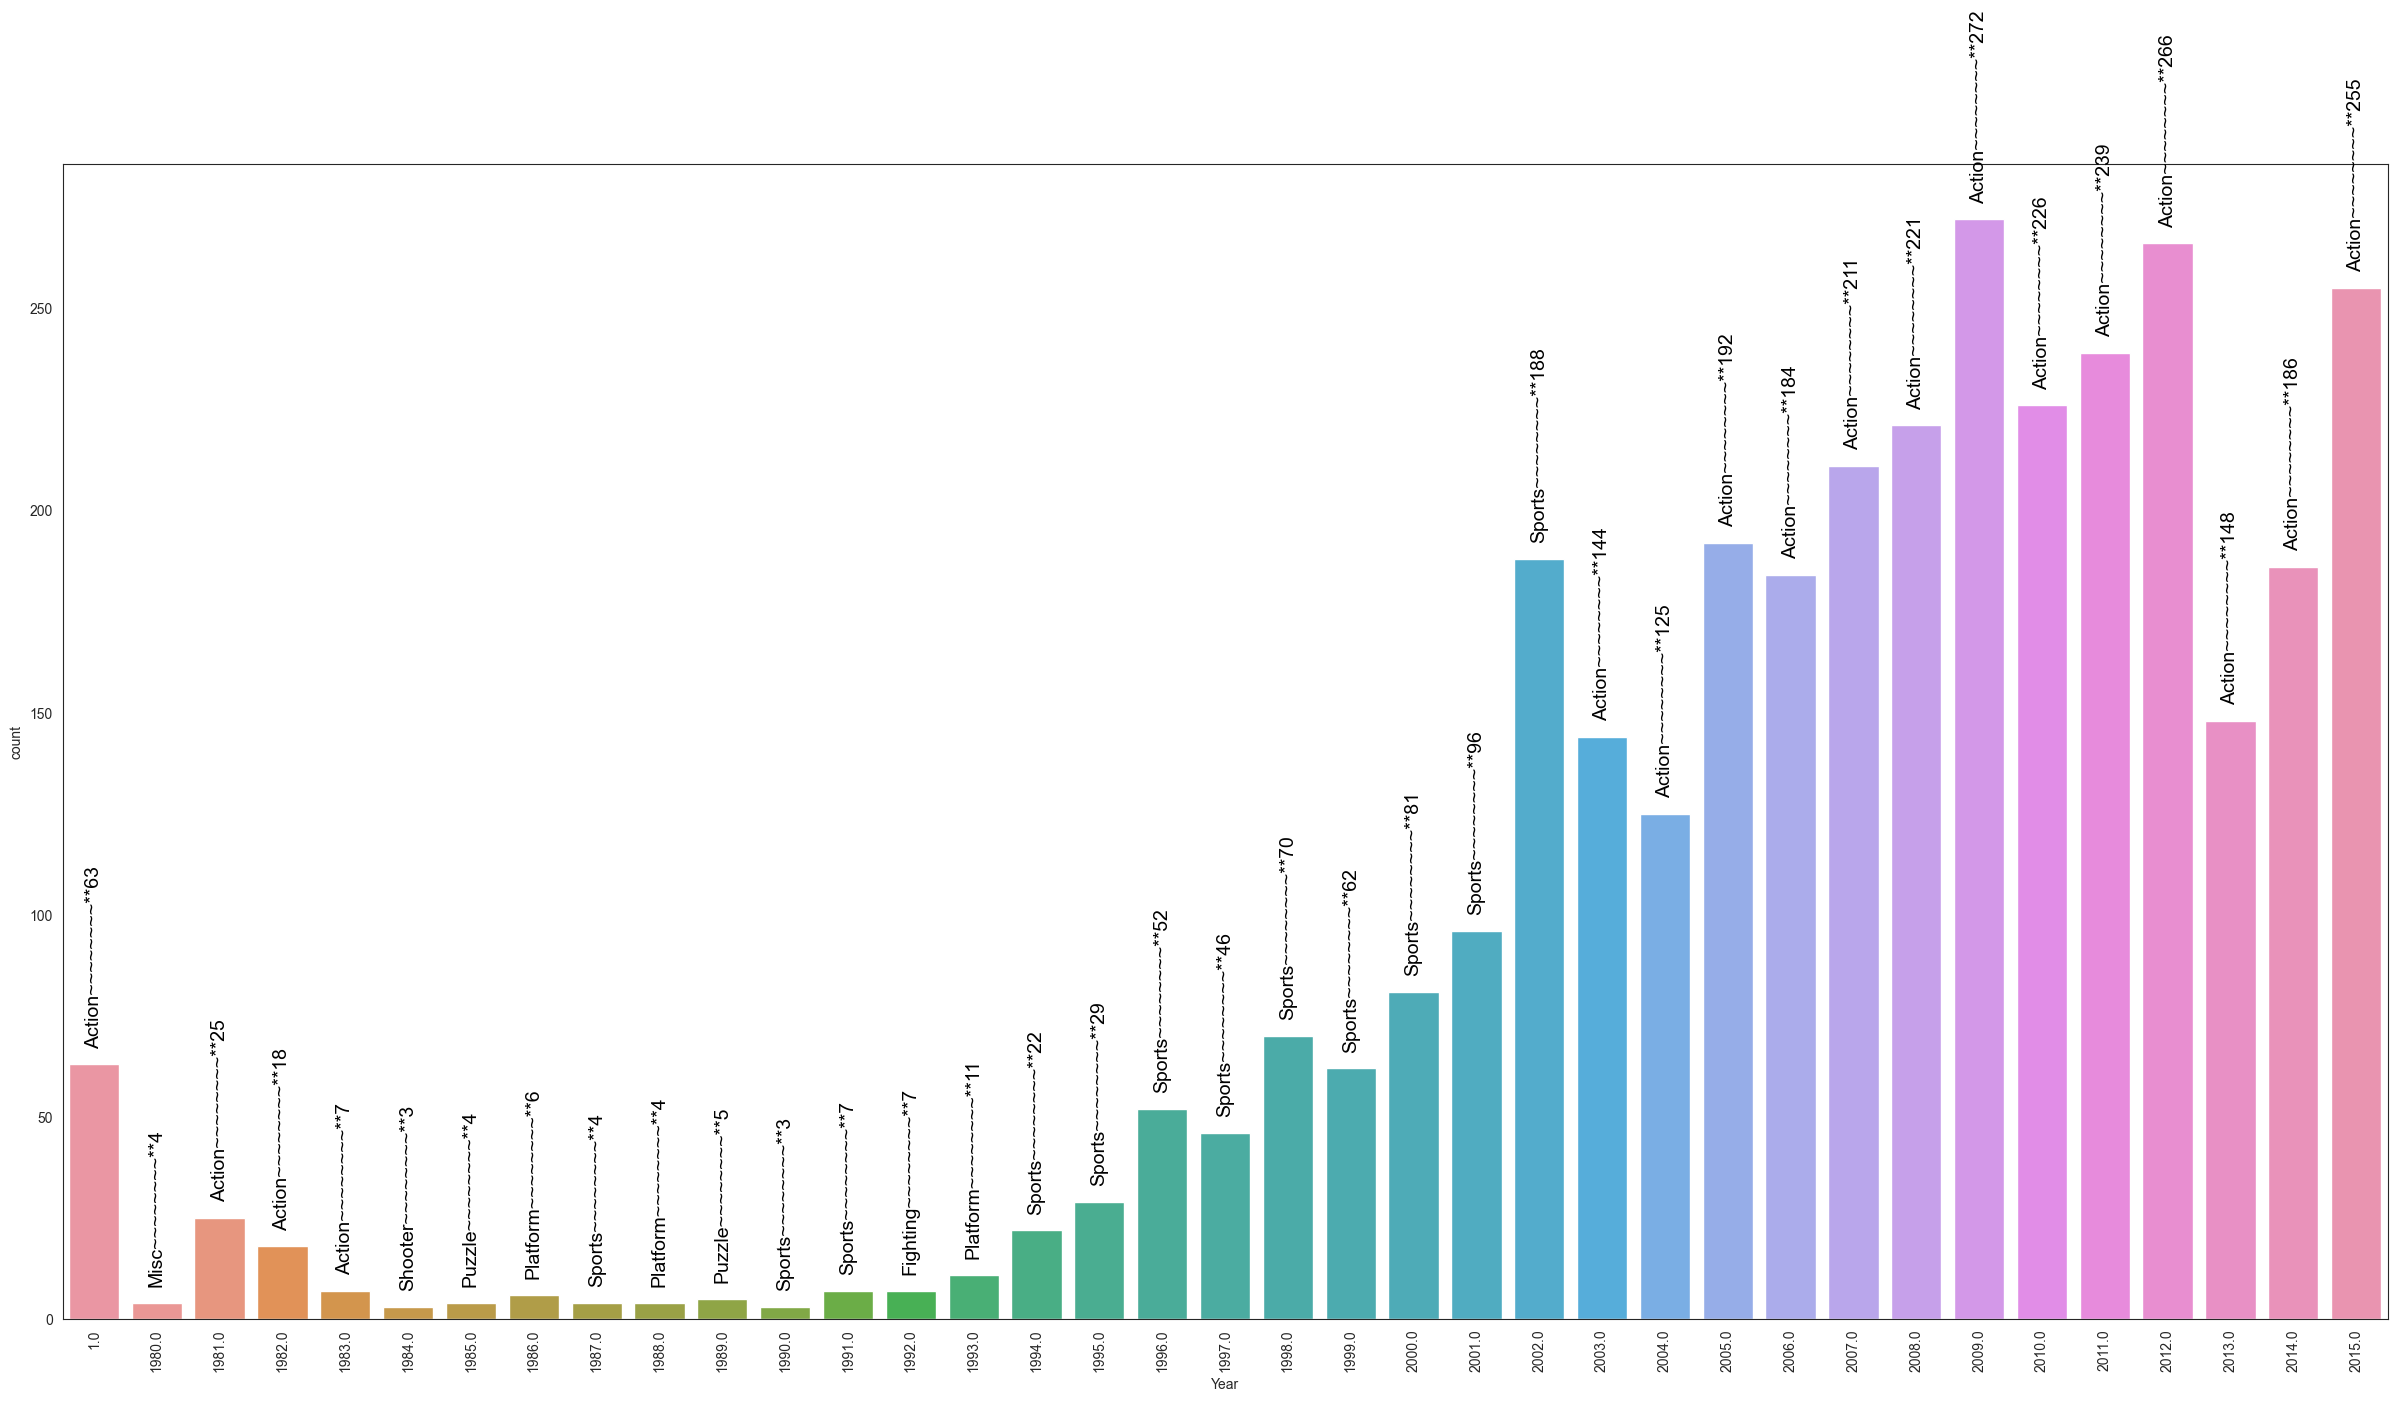

In [54]:
plt.figure(figsize=(30,15)) #here we set the size of the figure
g=sns.barplot(x="Year",y="count",data=year_max_genre) #we plotted a bar chart using the seaborn library's barplot
index=0
for value in year_max_genre["count"].values: #we have the relevant type and number printed on each bar 
    g.text(index,value+5,str(genre[index]+"~~~~~~~~**"+str(value)),color="#000",size=14,rotation=90,ha="center") #We did the writing operations with g.text 
        #The variable value expresses its type
    index+=1
plt.xticks(rotation=90)
plt.show()
# to visualize the data and to be more detailed
# We have seen which game genre has been released the most in 1 year!!!

The genres that emerged as the most popular are <b> Action, Sports, and Misc </b> , ranking as the top three choices.

# Publisher

Next, we will generate a count plot for the Publisher variable, which is another categorical variable. The process is similar to what we did before. However, it's worth noting that the Publisher variable contains numerous publishers, with many of them publishing only a few games.

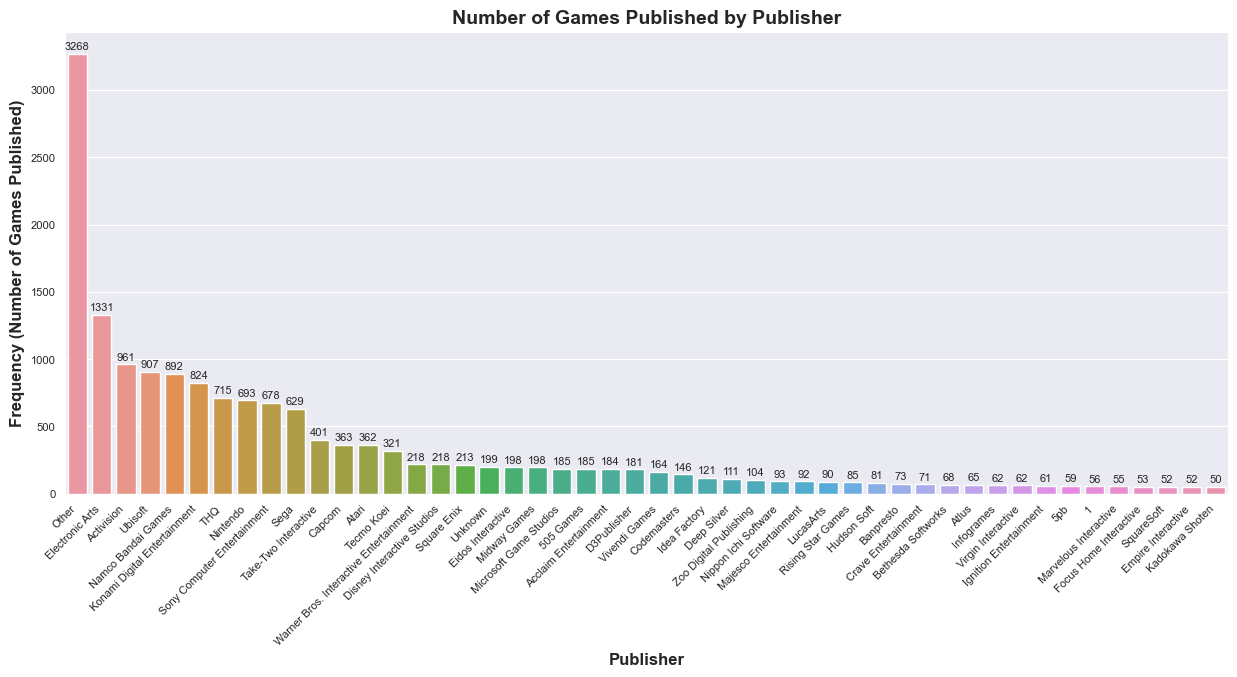

In [20]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#publisher frequency series
publisher_freq = df['Publisher'].value_counts()

#set a threshold for collapsing small categories
threshold = 50

#collapse small categories into a single group
small_categories = publisher_freq[publisher_freq < threshold]
publisher_freq['Other'] = publisher_freq[small_categories.index].sum()
publisher_freq.drop(small_categories.index, inplace=True)

#sort the series so that 'Other' is placed in right order
publisher_freq = publisher_freq.sort_values(ascending=False)

#plot the count plot in order
ax = sns.barplot(data=df, x=publisher_freq.index, y=publisher_freq.values, order=publisher_freq.index)

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height() - 50), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize = 8)

# Set the axis labels and title
plt.xlabel('Publisher', fontweight="bold", fontsize=12)
plt.ylabel('Frequency (Number of Games Published)', fontweight="bold", fontsize=12)
plt.title('Number of Games Published by Publisher', fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the plot
plt.show()

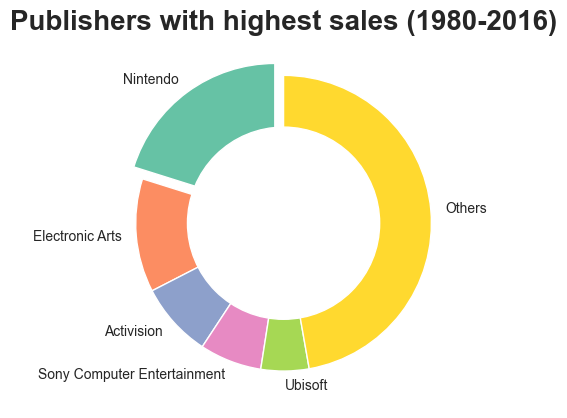

In [57]:
region = 'Global_Sales'
top5 = df[['Publisher',region]]
others = (top5.groupby('Publisher').sum().sort_values(by=region, ascending=False)[5:].Global_Sales.sum())
top5 = top5.groupby('Publisher').sum().sort_values(by=region, ascending=False)[:5]
top5.loc['Others'] = others
top5_arr = np.reshape(top5.values,-1)
top1_share = f'{round(top5_arr[0] / top5_arr.sum() * 100,1)}%'

plt.pie(
    top5_arr,
    labels = top5.index,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set2'),
    explode = [0.1,0,0,0,0,0],
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')

plt.gcf().gca().add_artist(hole)

plt.title('Publishers with highest sales (1980-2016)',fontdict={'size':20},fontweight = 'bold')
plt.show()


Surprisingly, the "Other" category, which includes smaller publishers, emerged as the leading publisher in the video game industry without any doubt. This reveals that there are numerous small publishers that collectively contribute to the vast selection of games available. <b> Electronic Arts, Activision, and Namco Bandai Games </b> secured the 2nd, 3rd, and 4th positions, respectively. <b> Nintendo </b> , despite having the most successful games in the top ten best-selling list, surprisingly ranked <b> 7th </b> with a total of 696 games.

# Regional Sales over Time

We now have the breakdown of sales for the NA, EU, JP, and Other regions. . Our goal is to identify any trends in sales over time in these four markets.
To achieve this, we'll start by constructing a dataframe. This dataframe will be created by combining four series, where each series represents the sales of one region over time.

In [22]:
NA_sales_by_year = df.groupby(['Year']).sum(numeric_only=True)["NA_Sales"]
EU_sales_by_year = df.groupby(['Year']).sum(numeric_only=True)["EU_Sales"]
JP_sales_by_year = df.groupby(['Year']).sum(numeric_only=True)["JP_Sales"]
Other_sales_by_year = df.groupby(['Year']).sum(numeric_only=True)["Other_Sales"]

#combine the four series into a df
sales_by_region = pd.concat([NA_sales_by_year, EU_sales_by_year, JP_sales_by_year, Other_sales_by_year], axis=1)
sales_by_region.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1.0,59.52,25.01,6.72,8.74
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14


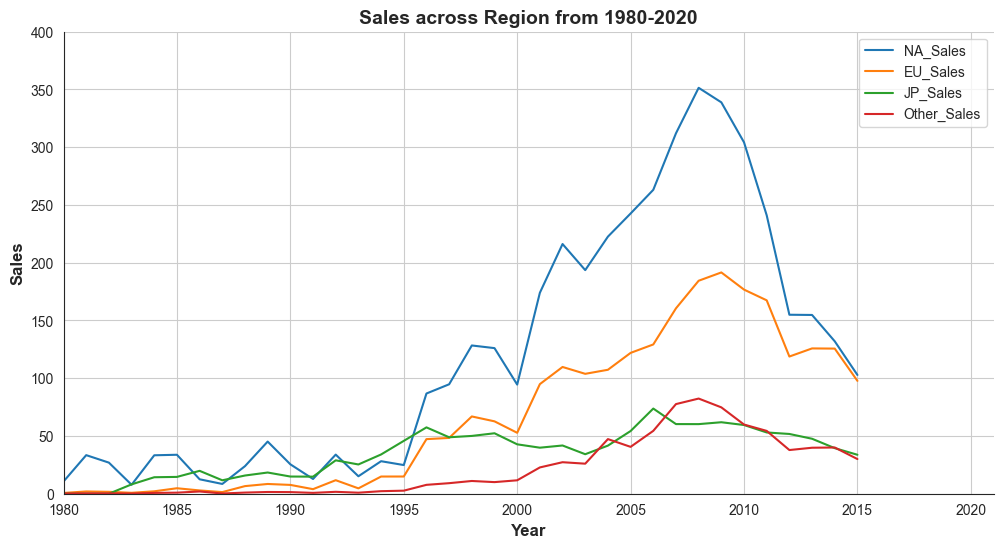

In [23]:
#set seaborn style
sns.set_style("white")

#plot dataframe as a line plot (it will plot all four variables)
sales_by_region.plot(kind="line", figsize=(12, 6))

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 400)

#set axis labels and titles
plt.xlabel('Year', fontweight="bold", fontsize=12)
plt.ylabel('Sales', fontweight="bold", fontsize=12)
plt.title('Sales across Region from 1980-2020', fontweight="bold", fontsize=14)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

We have the opportunity to analyze the growth of the gaming industry in various regions. The data reveals an interesting trend: the Japanese market experienced an early surge, surpassing the European market in the earlier years. However, due to potential limitations in market size, the European market eventually outpaced the Japanese market around 1997. Additionally, the global market (Other_Sales) started gaining momentum around 2000.

# Sales by Publishers (Top Ten) over Time

To get more information about the sale over the time ,we need to extract the top ten publishers and platforms based on their *Global_Sales*. Once we have this information, we can proceed to replicate the multiple line plot by following the same steps as before.

In [25]:
Global_Sales_by_Publisher = df.groupby(['Publisher']).sum(numeric_only=True)["Global_Sales"].sort_values(ascending = False)
top_ten_publisher_by_sales = Global_Sales_by_Publisher[:10].index

top_ten_publisher_by_sales

Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ',
       'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games'],
      dtype='object', name='Publisher')

In [26]:
data_top_ten_publisher = df[df['Publisher'].isin(top_ten_publisher_by_sales)]
data_top_ten_publisher.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
#create pivot table and fill in missing value
data_pivot_publisher = pd.pivot_table(data_top_ten_publisher, values='Global_Sales', index='Year', columns='Publisher', aggfunc='sum')
data_pivot_publisher.fillna(0, inplace=True)

data_pivot_publisher.head()

Publisher,Activision,Electronic Arts,Konami Digital Entertainment,Namco Bandai Games,Nintendo,Sega,Sony Computer Entertainment,THQ,Take-Two Interactive,Ubisoft
Year,,,,,,,,,,
1.0,6.05,16.93,5.08,0.44,2.13,2.29,0.22,0.33,0.24,1.18
1980.0,3.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981.0,8.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982.0,1.86,0.00,0.00,0.00,0.00,0.40,0.00,0.00,0.00,0.00
1983.0,1.94,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00


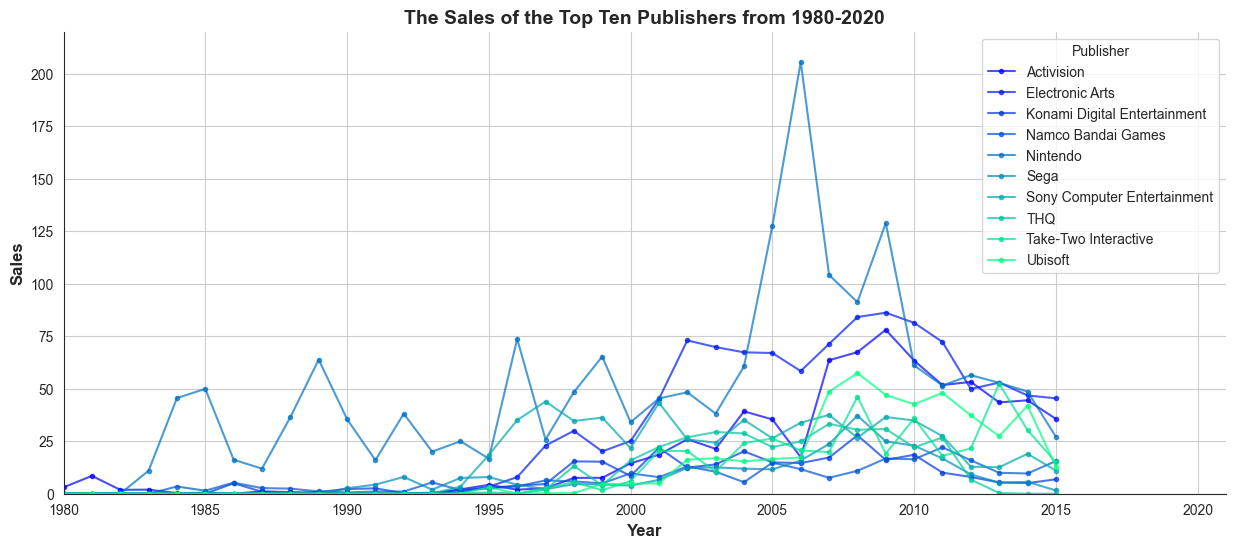

In [31]:
#plot multiple line plot
data_pivot_publisher.plot(kind="line", figsize=(15, 6), colormap='winter', marker=".", alpha=0.7)

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 220)

#set axis labels and titles
plt.xlabel('Year', fontweight="bold", fontsize=12)
plt.ylabel('Sales', fontweight="bold", fontsize=12)
plt.title('The Sales of the Top Ten Publishers from 1980-2020', fontweight="bold", fontsize=14)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

Nintendo emerged as an early player in the gaming industry, demonstrating consistent and noteworthy sales since the 1980s. Sony and Electronic Arts entered the scene around 1995, but Sony's sales trajectory reached its peak during its initial phase. On the other hand, Activision and Take-Two Interactive experienced significant growth in more recent years, marking their rise in the industry.

# Sales by Platform (Top Ten) over Time

The same application to visualize the sales trend for the top ten platforms.

In [32]:
#get the top ten platforms by Global_Sales
Global_Sales_by_Platform = df.groupby(['Platform']).sum(numeric_only=True)["Global_Sales"].sort_values(ascending = False)
top_ten_platform_by_sales = Global_Sales_by_Platform[:10].index

top_ten_platform_by_sales

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'XB', 'PC'], dtype='object', name='Platform')

In [33]:
#retain the rows with the top ten publishers 
data_top_ten_platforms = df[df['Platform'].isin(top_ten_platform_by_sales)]
data_top_ten_platforms.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [34]:
#create pivot table and fill in missing value
data_pivot_platform = pd.pivot_table(data_top_ten_platforms, values='Global_Sales', index='Year', columns='Platform', aggfunc='sum')
data_pivot_platform.fillna(0, inplace=True)

data_pivot_platform.head()

Platform,DS,GBA,PC,PS,PS2,PS3,PSP,Wii,X360,XB
Year,,,,,,,,,,
1.0,3.53,4.94,3.77,3.27,22.18,8.49,4.57,16.9,10.35,6.17
1985.0,0.02,0.00,0.03,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1988.0,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1992.0,0.00,0.00,3.02,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1994.0,0.00,0.00,12.85,6.02,0.00,0.00,0.00,0.0,0.00,0.00


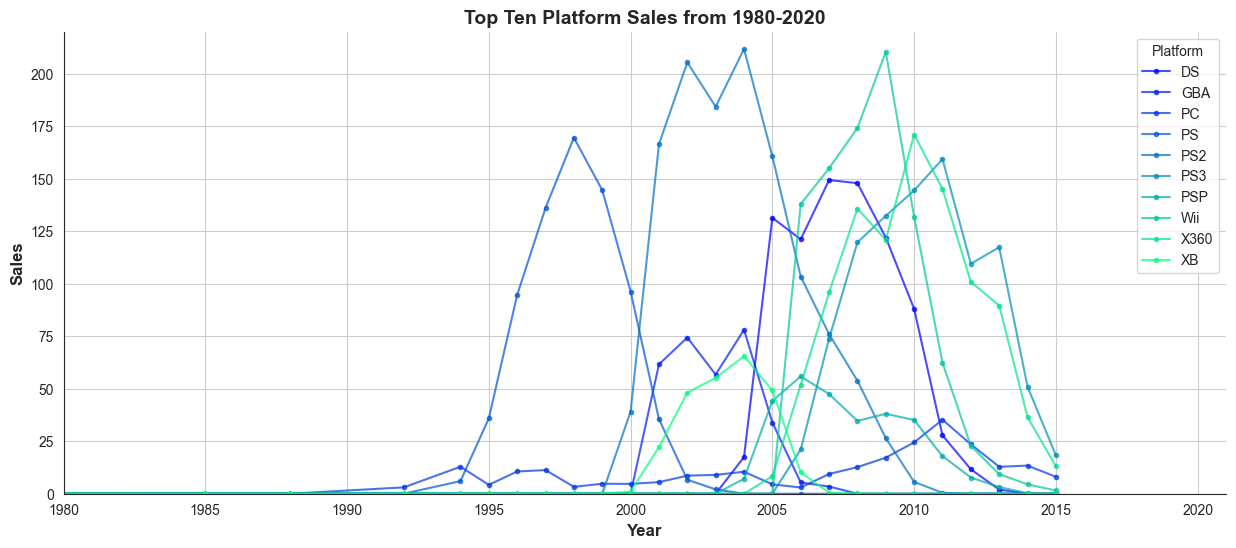

In [37]:
#plot multiple line plot
data_pivot_platform.plot(kind="line", figsize=(15, 6), colormap='winter', marker=".", alpha=0.7)

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 220)

plt.xlabel('Year', fontweight="bold", fontsize=12)
plt.ylabel('Sales', fontweight="bold", fontsize=12)
plt.title('Top Ten Platform Sales from 1980-2020', fontweight="bold", fontsize=14)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

We observe distinct fluctuations in the sales trends for different gaming platforms. The initial generation of PlayStation marked a significant milestone in the industry, exhibiting outstanding sales. However, with the successive release of newer generations (PS2, PS3, and PS4), sales swiftly transitioned towards these updated versions. Notably, the performance of PS3 and PS4 exhibited weaknesses and experienced a decline, particularly when compared to the success of the first two generations. This decline could potentially indicate that PlayStation is gradually losing its prominence in the market. Additionally, between 2005 and 2010, we witness a surge in the popularity of other platforms such as Wii, DS, and X360.

In [38]:
#get the aggregate sales for each genre of the four regions
NA_Sales_by_genre = df.groupby(['Genre']).sum(numeric_only=True)["NA_Sales"]
EU_Sales_by_genre = df.groupby(['Genre']).sum(numeric_only=True)["EU_Sales"]
JP_Sales_by_genre = df.groupby(['Genre']).sum(numeric_only=True)["JP_Sales"]
Other_Sales_by_genre = df.groupby(['Genre']).sum(numeric_only=True)["Other_Sales"]

#combine the four series into a dataframe
region_sales_by_genre_df = pd.concat([NA_Sales_by_genre, EU_Sales_by_genre, JP_Sales_by_genre, Other_Sales_by_genre], axis=1)
region_sales_by_genre_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,871.96,518.64,154.15,185.55
Adventure,105.46,63.74,51.10,16.70
Fighting,221.99,100.17,86.71,36.22
Misc,410.02,215.89,106.95,75.29
Platform,446.26,200.76,130.66,51.28
Puzzle,123.78,50.78,57.31,12.55
Racing,359.09,237.25,56.68,77.08
Role-Playing,325.89,186.77,348.64,59.17
Shooter,575.16,305.57,37.67,100.27


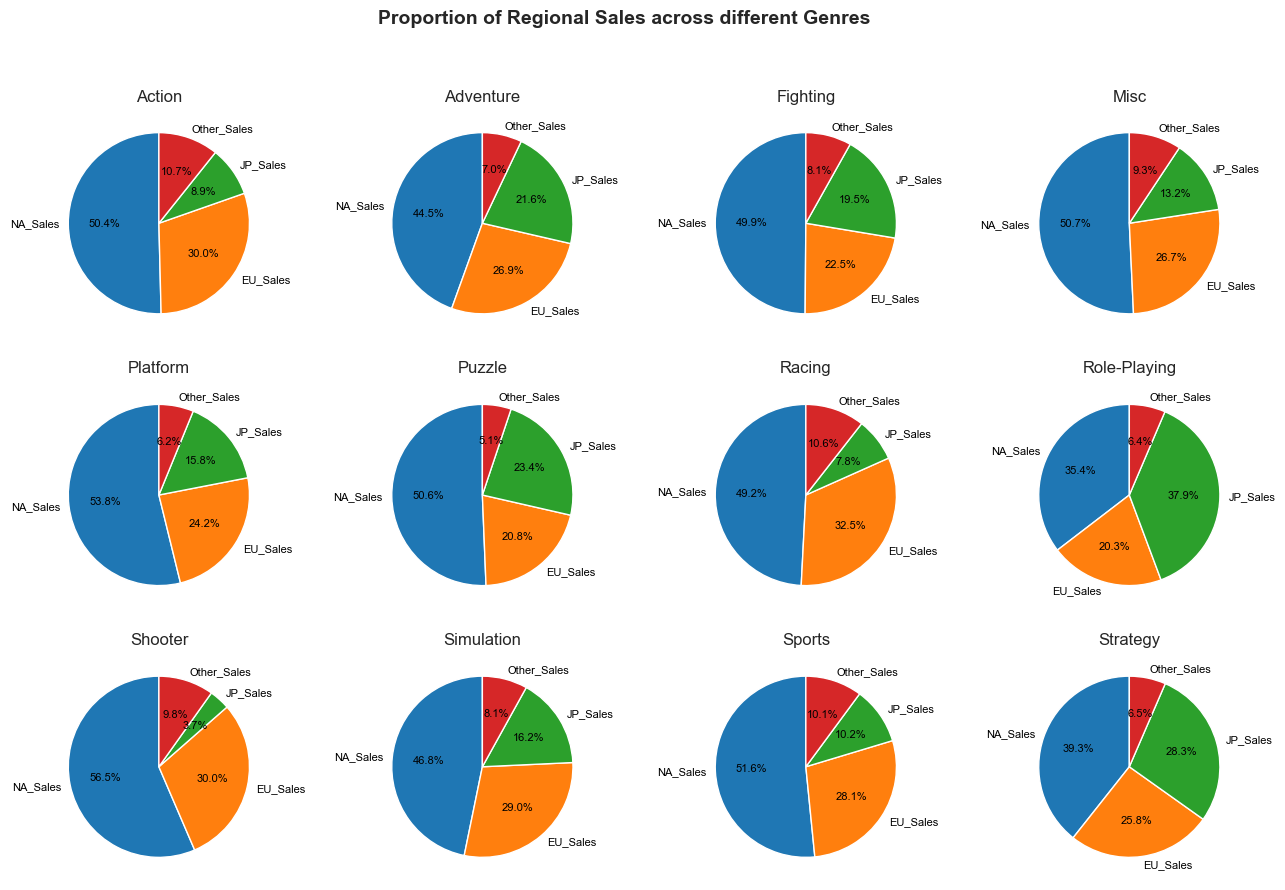

In [41]:
#create a 3x4 grid of subplots
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

#flatten the ax array so that we can iterate over it
ax = ax.flatten()

#define counter
i = 0
#loop over each row in the dataframe
for index, row in region_sales_by_genre_df.iterrows():
    
    #plot the pie chart
    ax[i].pie(row.values, 
              labels=region_sales_by_genre_df.columns, 
              autopct='%1.1f%%', 
              startangle=90, 
              textprops={'color': "Black", 'fontsize': 8})
    
    #set the title for each individual pie chart
    ax[i].set_title(index)
    #update counter
    i += 1

#set super title
fig.suptitle('Proportion of Regional Sales across different Genres', fontweight="bold", fontsize=14)

#display the plot
plt.show()

We can now visualize the regions that deviate from the norm in terms of genre preferences. Specifically, for the Role-Playing, Strategy, Puzzle, and Adventure genres, the Japanese market shows a comparatively higher level of interest. However, for Shooter and Racing genres, the Japanese market displays a lower level of interest. On the other hand, the North American region exhibits a significantly larger proportion of interest in the Shooter genre, but a lower proportion for Role-Playing and Strategy genres. The proportions in the European Union (EU) remain relatively consistent, accounting for approximately 20-30% of sales across all genres.

 <a id = '5'></a><br>
 <font color = '#B03A2E'>

# Summary




Video games provide a safe environment for enhancing our soft skills and honing our abilities. Certain games pose significant challenges, encouraging mastery. Nonetheless, these same games also offer beginners positive reinforcement for their small achievements, emphasizing the importance of finding joy in life's little moments, which may eventually reveal themselves to be significant.

I hope you thoroughly enjoyed reading this notebook and gained valuable insights from it. Throughout our discussion, we explored various data visualizations and techniques to enhance their visual appeal. I hope this not only provided you with an enjoyable experience but also facilitated your learning process.